# Step 1 : Read in the dataset

#### After reading in the dataset, we can print in the shape of the dataset. This tells us how many rows and columns are in the orignial dataset. Next, we can print the first five rows of data, and all columns. This gives us a glimpse of what the data looks like. Doing so shows us a column that can work as the index of the dataset, because it uniquley identifies each row to a customer id.

In [1]:
import pandas as pd

dataset = pd.read_csv('data/credit-card-holder-data/cc-general.csv')


print("Dataset shape : ", dataset.shape)
dataset.head()

Dataset shape :  (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Step 2 : Make CUST_ID the dataset index

#### Before we make the column 'CUST_ID' the dataset index, we check if the data in that column is fully uniuqe. If so we can make it the index. We can then print the new shape of the dataset. The columns as been reduced by 1.

In [2]:
if dataset['CUST_ID'].is_unique:
    dataset.set_index('CUST_ID', inplace=True)
    print("CUST_ID is unique and is now the index.")
else:
    dataset.drop('CUST_ID', axis=1, inplace=True)
    print("CUST_ID was not unique and has been removed.")

print("Dataset shape : ", dataset.shape)

CUST_ID is unique and is now the index.
Dataset shape :  (8950, 17)


# Step 3 : Calling the info method

#### Calling the info method tells us the data type for data in a column, the number rows that don't have a non-null value. Remembering the number of rows from the earlier shape call, and the data provided in info. I can see a gap in the number of rows with non-null values. Meaning, we have missing data.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

# Step 4 : Impute the data

#### Using the module Simple Imputer from Sklearn, we can augment the missing values in the dataset.

In [4]:
from sklearn.impute import SimpleImputer
from numpy import nan
from numpy import isnan

print("Before Imputation Dataset shape : ", dataset.shape)
imputer = SimpleImputer(missing_values=nan, strategy='mean')
imputed_dataset = imputer.fit_transform(dataset)
print('Missing: %d' % isnan(imputed_dataset).sum())

imputed_dataset = pd.DataFrame(imputed_dataset, columns=dataset.columns) # when imputing data we loose column names, adding them back in.
print("After Imputation Dataset shape : ", imputed_dataset.shape)
imputed_dataset.info()

Before Imputation Dataset shape :  (8950, 17)
Missing: 0
After Imputation Dataset shape :  (8950, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX              

# Step 5 : Remove rows with missing data

In [5]:
missing_values = dataset.isnull().sum()
print("missing values count : ", missing_values)

missing values count :  BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [6]:
drop_dataset = dataset
drop_dataset = drop_dataset.dropna(subset='MINIMUM_PAYMENTS')
drop_dataset = drop_dataset.dropna(subset='CREDIT_LIMIT')
missing_values = drop_dataset.isnull().sum()
print("missing values count : ", missing_values)

missing values count :  BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


# Step 6 : Calling the method describe

#### Pandas dataframes have a method known as describe. This method calculates some useful data for each column. Looking at the results we notice that their are outliers in our data. I.E. customers that fall outside the normal distribution. Knowing this we can attempt to account for this in our experiments.

#### There are few indicators that I am looking for when reviewing the output from describe. First thing I look at is the standard deviation (std in the describe output). Standard deviation tells us the amount of variation in a set of data, and in this case for a specific column. A low standard deviation means that the row values in a column tend to hover around the average value for that column (a.k.a mean). When the standard deviation is high, that means rows in the column tend to deviate far from the avearge value for a row in a column. Indicating that there are outliers in the dataset. Outliers can negativley impact a few of the algorithims we use, so this is good information to know.

#### Another item to look at from describe would be the values from 25%, 50%, 75%, min, and max. Min tells us the smalles value in the column, max tells us the largest value in the column. 25%/50%/75% tells us what percentage of the column has the outputed value. Example, the 25% balance is 148$ and the 50% balance is 916$. Meaning that 25% of the column has a balance of 148$ and below, and 50% of the column has 916$ and below. When taking each of the values into conisderation, you'd expect to see a gradual increase from min, 25%, 50%, 75%, and max. When you don't see a gradual increase, it tends to indicate outliers.

#### We're also going to compare the differences in standard deviation between 3 datasets. 1) original dataset 2) imputed dataset 3) dropped dataset.

In [7]:
print("Describe on original dataset. Original dataset shape : ", dataset.shape)
dataset.describe()

Describe on original dataset. Original dataset shape :  (8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
print("Describe on imputed dataset. Imputed dataset shape : ", imputed_dataset.shape)
imputed_dataset["MINIMUM_PAYMENTS"].describe()

Describe on imputed dataset. Imputed dataset shape :  (8950, 17)


count     8950.000000
mean       864.206542
std       2330.588021
min          0.019163
25%        170.857654
50%        335.628312
75%        864.206542
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [9]:
print("Describe on dropped dataset. Dropped dataset shape : ", drop_dataset.shape)
drop_dataset.describe()

Describe on dropped dataset. Dropped dataset shape :  (8636, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
original_std = dataset.describe().loc['std']
imputed_std = imputed_dataset.describe().loc['std']
dropped_std = drop_dataset.describe().loc['std']

diff_imputed = imputed_std - original_std
diff_dropped = dropped_std - original_std

print("Diff of imputed data -------\n")
print(diff_imputed)
print("\n -------------------------")

Diff of imputed data -------

BALANCE                              0.000000
BALANCE_FREQUENCY                    0.000000
PURCHASES                            0.000000
ONEOFF_PURCHASES                     0.000000
INSTALLMENTS_PURCHASES               0.000000
CASH_ADVANCE                         0.000000
PURCHASES_FREQUENCY                  0.000000
ONEOFF_PURCHASES_FREQUENCY           0.000000
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000
CASH_ADVANCE_FREQUENCY               0.000000
CASH_ADVANCE_TRX                     0.000000
PURCHASES_TRX                        0.000000
CREDIT_LIMIT                        -0.203314
PAYMENTS                             0.000000
MINIMUM_PAYMENTS                   -41.858585
PRC_FULL_PAYMENT                     0.000000
TENURE                               0.000000
Name: std, dtype: float64

 -------------------------


In [11]:
print("Diff of dropped data -------\n")
print(diff_dropped)
print("\n -------------------------")

Diff of dropped data -------

BALANCE                             14.039421
BALANCE_FREQUENCY                   -0.029207
PURCHASES                           30.473202
ONEOFF_PURCHASES                    24.419886
INSTALLMENTS_PURCHASES              12.907067
CASH_ADVANCE                        24.294426
PURCHASES_FREQUENCY                 -0.000098
ONEOFF_PURCHASES_FREQUENCY           0.001718
PURCHASES_INSTALLMENTS_FREQUENCY     0.000645
CASH_ADVANCE_FREQUENCY               0.001670
CASH_ADVANCE_TRX                     0.087859
PURCHASES_TRX                        0.322819
CREDIT_LIMIT                        20.424654
PAYMENTS                            14.746334
MINIMUM_PAYMENTS                     0.119744
PRC_FULL_PAYMENT                     0.003772
TENURE                              -0.027347
Name: std, dtype: float64

 -------------------------


# Step 7 : Quantify outliers

#### We know that we have outliers, but now the question is how many? We can find these values using the interquartile range (IQR) 1.5x rule. I'll write a method illustrating this rule, and then show the counts for outliers.

In [12]:

def count_outliers(data):
    outlier_counts = {}
    for column in data.columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        i = 0
        print(f'Column {column} : lower bound {lower_bound} : upper bound {upper_bound}')
        for value in data[column]:
            if value > upper_bound or value < lower_bound:
                i += 1
        outlier_counts[column] = i
    return outlier_counts

In [13]:
original_outlier_count = count_outliers(dataset)
imputed_outlier_count = count_outliers(imputed_dataset)
dropped_outlier_count = count_outliers(drop_dataset)

Column BALANCE : lower bound -2760.5052645 : upper bound 4942.9272155
Column BALANCE_FREQUENCY : lower bound 0.7222225000000001 : upper bound 1.1666664999999998
Column PURCHASES : lower bound -1566.1075000000003 : upper bound 2715.8725000000004
Column ONEOFF_PURCHASES : lower bound -866.1075 : upper bound 1443.5124999999998
Column INSTALLMENTS_PURCHASES : lower bound -702.95625 : upper bound 1171.59375
Column CASH_ADVANCE : lower bound -1670.7317088750003 : upper bound 2784.5528481250003
Column PURCHASES_FREQUENCY : lower bound -1.166668 : upper bound 2.166668
Column ONEOFF_PURCHASES_FREQUENCY : lower bound -0.44999999999999996 : upper bound 0.75
Column PURCHASES_INSTALLMENTS_FREQUENCY : lower bound -1.125 : upper bound 1.875
Column CASH_ADVANCE_FREQUENCY : lower bound -0.333333 : upper bound 0.555555
Column CASH_ADVANCE_TRX : lower bound -6.0 : upper bound 10.0
Column PURCHASES_TRX : lower bound -23.0 : upper bound 41.0
Column CREDIT_LIMIT : lower bound -5750.0 : upper bound 13850.0
C

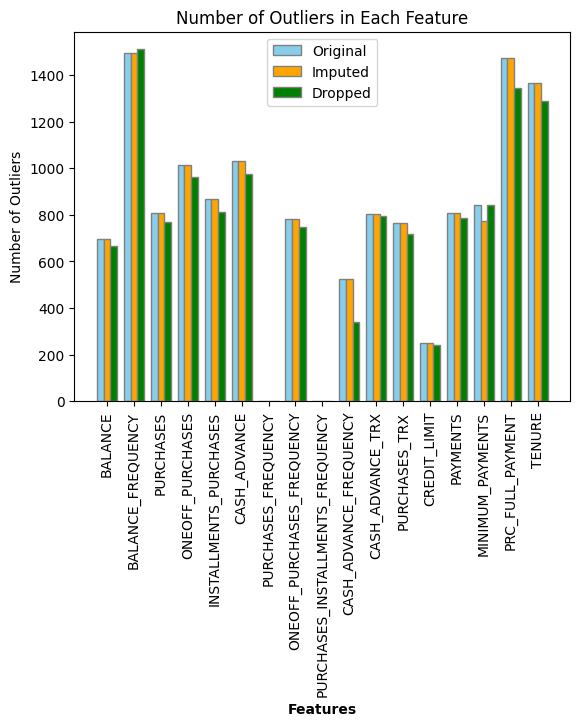

In [23]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.25
original_dataset_bar_posistions = list(range(len(original_outlier_count)))

imputed_dataset_bar_posistions = []
for i in original_dataset_bar_posistions:
    imputed_dataset_bar_posistions.append(i + barWidth)

dropped_dataset_bar_posistions = []
for i in imputed_dataset_bar_posistions:
    dropped_dataset_bar_posistions.append(i + barWidth)


plt.bar(original_dataset_bar_posistions, original_outlier_count.values(), color='skyblue', width=barWidth, edgecolor='gray', label='Original')
plt.bar(imputed_dataset_bar_posistions, imputed_outlier_count.values(), color='orange', width=barWidth, edgecolor='gray', label='Imputed')
plt.bar(dropped_dataset_bar_posistions, dropped_outlier_count.values(), color='green', width=barWidth, edgecolor='gray', label='Dropped')


plt.xlabel('Features', fontweight='bold')
plt.ylabel('Number of Outliers')


plt.xticks(imputed_dataset_bar_posistions, list(original_outlier_count.keys()))


plt.title('Number of Outliers in Each Feature')
plt.legend()
plt.xticks(rotation=90) 
plt.show()